In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyedfread import edf
from neo.io import BlackrockIO
import DataProcessingTools as DPT
import time
import PyHipp as pyh

In [15]:
# File loading step
data = np.loadtxt("picasso/session01/RawData_T1-400/session_1_5112018105323.txt", skiprows=14)

In [16]:
# 2d
uind = np.arange(300)

In [16]:
# 2e
ut = np.cumsum(data[uind,1])

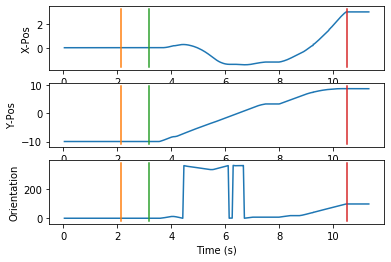

In [3]:
# 2h NEED TO SUBMIT
plt.figure()
plt.subplot(3,1,1)
plt.plot(ut,data[uind,2])
plt.xlabel('Time (s)')
plt.ylabel('X-Pos')
mi = data[uind,0].nonzero()
yl = plt.ylim()
t2 = ut[mi[0][1:]]
pt2 = np.kron(np.ones((2,1)),t2)
py2 = np.kron(np.ones((np.size(pt2,1),1)),yl).transpose()
plt.plot(pt2,py2)

plt.subplot(3,1,2)
plt.plot(ut,data[uind,3])
plt.xlabel('Time (s)')
plt.ylabel('Y-Pos')
yl = plt.ylim()
py2 = np.kron(np.ones((np.size(pt2,1),1)),yl).transpose()
plt.plot(pt2,py2)

plt.subplot(3,1,3)
plt.plot(ut,data[uind,4])
plt.xlabel('Time (s)')
plt.ylabel('Orientation')
yl = plt.ylim()
py2 = np.kron(np.ones((np.size(pt2,1),1)),yl).transpose()
plt.plot(pt2,py2)

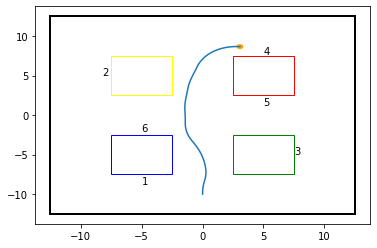

In [69]:
# 2g NEED TO WRITE AND SUBMIT
from matplotlib.patches import Rectangle, Circle
plt.figure()
currentAxis = plt.gca()

# Draw maze boundaries
currentAxis.add_patch(Rectangle((-12.5, -12.5), 25, 25, fill=None,lw=2))

# Draw pillars inside maze
currentAxis.add_patch(Rectangle((-7.5, 2.5), 5, 5, fill=None,ec='yellow'))
currentAxis.add_patch(Rectangle((-7.5, -7.5), 5, 5, fill=None, ec='blue'))
currentAxis.add_patch(Rectangle((2.5, 2.5), 5, 5, fill=None, ec='red'))
currentAxis.add_patch(Rectangle((2.5, -7.5), 5, 5, fill=None, ec='green'))

# Add marker to last point
currentAxis.add_patch(Circle((data[uind,2][-1],data[uind,3][-1]), radius=0.25, color='orange'))

# Add text labels to mark locations of posters
plt.text(-5, -8.75, '1')
plt.text(-8.25, 5, '2')
plt.text(7.5, -5, '3')
plt.text(5, 7.75, '4')
plt.text(5, 1.25, '5')
plt.text(-5, -2, '6')

# Plot position data
plt.plot(data[uind,2],data[uind,3])

In [7]:
# Data loading step
samples, events, messages = edf.pread('picasso/181105.edf', trial_marker=b'Start Trial')

Index(['time', 'px_left', 'px_right', 'py_left', 'py_right', 'hx_left',
       'hx_right', 'hy_left', 'hy_right', 'pa_left', 'pa_right', 'gx_left',
       'gx_right', 'gy_left', 'gy_right', 'rx', 'ry', 'gxvel_left',
       'gxvel_right', 'gyvel_left', 'gyvel_right', 'hxvel_left', 'hxvel_right',
       'hyvel_left', 'hyvel_right', 'rxvel_left', 'rxvel_right', 'ryvel_left',
       'ryvel_right', 'fgxvel', 'fgyvel', 'fhxyvel', 'fhyvel', 'frxyvel',
       'fryvel', 'flags', 'input', 'buttons', 'htype', 'errors'],
      dtype='object')

In [23]:
# 3c
samples.columns
samples[['time','gx_left','gy_left']][0:9]

In [23]:
# 3d
events[['type','start','end']][0:9]

In [23]:
# 3e
messages[['trialid_time','Cue_time','End_time','Timeout_time']][0:9]
messages['RECCFG'][0][1]

In [23]:
# 3f
esr = int(messages['RECCFG'][0][1])
samples['time'] = samples['time']/esr
events[['start','end']] = events[['start','end']]/esr
messages[['trialid_time','Cue_time','End_time']] = messages[['trialid_time','Cue_time','End_time']]/esr

In [23]:
# 3g
eind = np.arange(15000)
ex = samples['gx_left'][eind]
et = samples['time'][eind]
plt.plot(et,ex)
plt.xlabel('Time (s)')
plt.ylabel('Eye Position X')

In [23]:
# 3h
ex[ex>1920] = np.nan
ex[ex<0] = np.nan

In [23]:
# 3i
ax = plt.gca()
ax.clear()
plt.plot(et,ex)
plt.xlabel('Time (s)')
plt.ylabel('Eye Position X')

In [23]:
# 3j
yl = plt.ylim()
xval = events['start'][0]
plt.plot([xval,xval],yl)
xval = events['end'][0]
plt.plot([xval,xval],yl)

In [23]:
# 3k
xval = events['start'][1]
plt.plot([xval,xval],yl)
xval = events['end'][1]
plt.plot([xval,xval],yl)

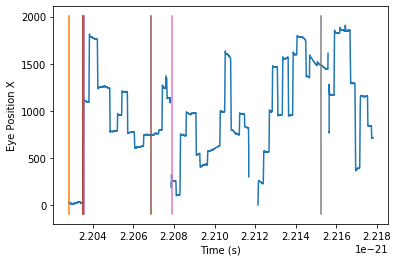

In [23]:
# 3m
xval = messages['trialid_time'][1]
plt.plot([xval,xval],yl)
xval = messages['Cue_time'][1]
plt.plot([xval,xval],yl)
xval = messages['End_time'][1]
plt.plot([xval,xval],yl)

In [24]:
# 3n NEED TO WRITE AND SUBMIT

In [36]:
# File loading step
reader = BlackrockIO('picasso/session01/181105_Block1.ns5')

In [42]:
# 4c
bl = reader.read_block(lazy = True)
bl

In [42]:
# 4d
bl.segments[0].analogsignals[1].shape

In [42]:
# 4e
data = np.array(bl.segments[0].analogsignals[1].load(time_slice=None, channel_indexes=[2]))

In [42]:
# 4f
sr = float(bl.segments[0].analogsignals[1].sampling_rate)
sr

30000.0

In [43]:
# File loading step
reader = BlackrockIO('picasso/session01/181105_Block1.nev')

In [48]:
# 4g
ev_rawtimes, _, ev_markers = reader.get_event_timestamps()

In [48]:
# 4h
ev_markers[0:9]

In [48]:
# 4i
ev_rawtimes[0:9]

array([183607, 183628, 245904, 245905, 276652, 276653, 497314, 497315,
       557948], dtype=uint32)

In [49]:
# 4j NEED TO WRITE AND SUBMIT

In [50]:
# 5a NEED TO WRITE AND SUBMIT

In [51]:
# 5b NEED TO WRITE AND SUBMIT

In [3]:
# 6b # Takes for ever and lots of RAM 😞
t0 = time.time()
DPT.objects.processDirs(dirs=None, objtype=pyh.RPLParallel, saveLevel=1)
DPT.objects.processDirs(dirs=None, objtype=pyh.RPLSplit, channel=[9, 31, 34, 56, 72, 93, 119, 120], saveLevel=1)
print(time.time() - t0)

Object loaded from file rplparallel_72a7.hkl
Object loaded from file rplparallel_72a7.hkl
Object created
.ns5 file loaded.
Processing channel 009
Calling RPLRaw for channel 009
Object created
Object saved to file rplraw_72a7.hkl
Channel 009 processed
Processing channel 031
Calling RPLRaw for channel 031
Object created
Object saved to file rplraw_72a7.hkl
Channel 031 processed
Processing channel 034
Calling RPLRaw for channel 034
Object created
Object saved to file rplraw_72a7.hkl
Channel 034 processed
Processing channel 056
Calling RPLRaw for channel 056
Object created
Object saved to file rplraw_72a7.hkl
Channel 056 processed
Processing channel 072
Calling RPLRaw for channel 072
Object created
Object saved to file rplraw_72a7.hkl
Channel 072 processed
Processing channel 093
Calling RPLRaw for channel 093
Object created
Object saved to file rplraw_72a7.hkl
Channel 093 processed
Processing channel 119
Calling RPLRaw for channel 119
Object created
Object saved to file rplraw_72a7.hkl
Cha

In [5]:
# 6c
t0 = time.time()
DPT.objects.processDirs(dirs=None, objtype=pyh.RPLLFP, saveLevel=1)
DPT.objects.processDirs(dirs=None, objtype=pyh.RPLHighPass, saveLevel=1)
print(time.time() - t0)

Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequencies 1.0 and 150.0 Hz
Object saved to file rpllfp_e7c1.hkl
Object loaded from file rplraw_72a7.hkl
Object created
Applying low-pass filter with frequenci

In [7]:
# 6d
t0 = time.time()
DPT.objects.processDirs(dirs=None, objtype=pyh.Unity, saveLevel=1)
print(time.time() - t0)                        

Object created
Object loaded from file rplparallel_72a7.hkl
Object saved to file unity_5878.hkl
2.9422149658203125


In [10]:
# 6e
t0 = time.time()
pyh.EDFSplit(saveLevel=1)
print(time.time() - t0)

ValueError: 'lab' is not in list

In [11]:
cd session01

[Errno 2] No such file or directory: 'session01'
/home/chen/Documents/ee3801-data-engineering-principles-labs/lab_5
